In [280]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv("train_(2)_(1).csv")
train_df.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
avg_rent_df = pd.read_csv("avg_rent_(1)_(1).csv")
avg_rent_df.head()

,location,avg_2bhk_rent
0,Krishnarajapura,11954
1,Sarjapur,45000
2,Whitefield Hope Farm Junction,26370
3,Devanahalli,17302
4,Whitefield,14981


In [9]:
rent_merged = pd.merge(train_df, avg_rent_df, how="left", left_on="location", right_on="location")

In [8]:
dist_df = pd.read_csv("dist_from_city_centre_(1)_(1).csv")
dist_df.head()

,location,dist_from_city
0,Whitefield,17.3
1,Sarjapur Road,17.2
2,Electronic City,18.1
3,Kanakpura Road,26.5
4,Thanisandra,11.5


In [10]:
full_merged_df = pd.merge(left=rent_merged, right=dist_df, how="left", left_on="location", right_on="location")
full_merged_df.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price,avg_2bhk_rent,dist_from_city
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,11500.0,19.3
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,NaN,34.6
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,19750.0,12.9
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,NaN,21.4
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,16375.0,11.8


In [21]:
cal = full_merged_df["location"].astype('string')

In [25]:
cal[0].replace(" ", "").lower()

'electroniccityphaseii'

In [26]:
full_merged_df["location"].str.upper()

0              ELECTRONIC CITY PHASE II
1                      CHIKKA TIRUPATHI
2                           UTTARAHALLI
3                    LINGADHEERANAHALLI
4                              KOTHANUR
                      ...              
10651                PARAPPANA AGRAHARA
10652                       BHOGANHALLI
10653    DODDANAKUNDI INDUSTRIAL AREA 2
10654                KACHANAYAKANAHALLI
10655                HORAMAVU BANASWADI
Name: location, Length: 10656, dtype: object

In [27]:
from difflib import get_close_matches
for i in range(dist_df.shape[0]):
    print(dist_df['location'][i].lower(), get_close_matches(dist_df['location'][i].lower(), dist_df['location'].str.lower()))

In [61]:
full_merged_df['sqft'] = full_merged_df["size"].str.extract('(\d+)')
full_merged_df.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price,avg_2bhk_rent,dist_from_city,sqft
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,11500.0,19.3,2
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,NaN,34.6,4
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,19750.0,12.9,3
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,NaN,21.4,3
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,16375.0,11.8,2


In [282]:
reduced_col = full_merged_df[["sqft", "total_sqft", "bath", "balcony", "price", "avg_2bhk_rent", "dist_from_city"]]
reduced_col.head()

,sqft,total_sqft,bath,balcony,price,avg_2bhk_rent,dist_from_city
0,2,1056,2.0,1.0,39.07,11500.0,19.3
1,4,2600,5.0,3.0,120.00,NaN,34.6
2,3,1440,2.0,3.0,62.00,19750.0,12.9
3,3,1521,3.0,1.0,95.00,NaN,21.4
4,2,1200,2.0,1.0,51.00,16375.0,11.8


In [283]:
reduced_col.isnull().sum()

sqft                14
total_sqft           0
bath                65
balcony            504
price                0
avg_2bhk_rent     6991
dist_from_city    1026
dtype: int64

In [284]:
reduced_col.describe()

,bath,balcony,price,avg_2bhk_rent,dist_from_city
count,10591.000000,10152.000000,10656.000000,3665.000000,9630.000000
mean,2.690586,1.581757,112.214256,15363.440109,15.191080
std,1.352403,0.821357,142.231967,14472.805948,6.242696
min,1.000000,0.000000,8.000000,1756.000000,1.900000
25%,2.000000,1.000000,50.000000,11714.000000,11.100000
50%,2.000000,2.000000,72.000000,14981.000000,14.400000
75%,3.000000,2.000000,120.000000,17340.000000,17.400000
max,40.000000,3.000000,2700.000000,800000.000000,47.700000


In [285]:
reduced_col.rename(columns={"sqft": "bhk"}, inplace=True)
reduced_col['bhk'] = reduced_col["bhk"].astype(np.number)
reduced_col.head()

C:\Users\priya\anaconda3\envs\AlgoTrading\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


,bhk,total_sqft,bath,balcony,price,avg_2bhk_rent,dist_from_city
0,2.0,1056,2.0,1.0,39.07,11500.0,19.3
1,4.0,2600,5.0,3.0,120.00,NaN,34.6
2,3.0,1440,2.0,3.0,62.00,19750.0,12.9
3,3.0,1521,3.0,1.0,95.00,NaN,21.4
4,2.0,1200,2.0,1.0,51.00,16375.0,11.8


In [286]:
bkup_df = full_merged_df.copy()

In [287]:
#Missing Value identification and imputation
reduced_col.balcony.fillna(0, inplace=True)


In [288]:
reduced_col.isnull().sum()

bhk                 14
total_sqft           0
bath                65
balcony              0
price                0
avg_2bhk_rent     6991
dist_from_city    1026
dtype: int64

In [289]:
temp = reduced_col.total_sqft.str.extract(r'([a-zA-Z]+\w+[a-zA-Z]+)')
temp.rename(columns={0:"value"}, inplace=True)
temp.value_counts()

value  
Meter      15
Yards      13
Acres       7
Cents       2
Grounds     1
Guntha      1
Perch       1
Name: count, dtype: int64

In [290]:
val = reduced_col.iloc[648].loc["total_sqft"]
print(val.find("Perch"))
digit = int(re.findall(r'\d+', val)[0])
print(digit)
#reduced_col.iloc[648].loc["total_sqft"] = str(digit)
reduced_col.iloc[648, reduced_col.columns.get_loc("total_sqft")] = str(digit)
print(reduced_col.iloc[648].loc["total_sqft"])

4
4125
4125


In [316]:
import re
def convert_total_sqft(df):
    for idx in range(df.shape[0]):
        val = str(df.total_sqft[idx])
        if(val.isdigit() == True):
            continue;
        #digit = int(val.extract(r('\d+')))
        digit = int(re.findall(r'\d+', val)[0])
        print(val, digit)
        if(val.find("Meter") != -1):
            digit = digit * 10.7
            df.iloc[idx, df.columns.get_loc("total_sqft")] = str(digit)
        if(val.find("Acres") != -1):
            digit = digit * 43560
            df.iloc[idx, df.columns.get_loc("total_sqft")] = str(digit)
        if(val.find("Yards") != -1):
            digit = digit * 9
            df.iloc[idx, df.columns.get_loc("total_sqft")] = str(digit)
        if(val.find("Cents") != -1):
            digit = digit * 435.56
            df.iloc[idx, df.columns.get_loc("total_sqft")] = str(digit)
        if(val.find("Grounds") != -1):
            digit = digit * 2400.35
            df.iloc[idx, df.columns.get_loc("total_sqft")] = str(digit)
        if(val.find("Guntha") != -1):
            digit = digit * 1089
            df.iloc[idx, df.columns.get_loc("total_sqft")] = str(digit)
        if(val.find("Perch") != -1):
            digit = digit * 272
            df.iloc[idx, df.columns.get_loc("total_sqft")] = str(digit)
        if(val.find("-") != -1):
            df.iloc[idx, df.columns.get_loc("total_sqft")] = val.split('-')[1]
#convert_total_sqft(reduced_col)

In [292]:
reduced_col['total_sqft'] = reduced_col['total_sqft'].astype(np.float64, copy=False)

In [293]:
reduced_col.dtypes

bhk               float64
total_sqft        float64
bath              float64
balcony           float64
price             float64
avg_2bhk_rent     float64
dist_from_city    float64
dtype: object

In [294]:
reduced_col.isnull().sum()

bhk                 14
total_sqft           0
bath                65
balcony              0
price                0
avg_2bhk_rent     6991
dist_from_city    1026
dtype: int64

In [295]:
#
reduced_col = reduced_col[reduced_col['total_sqft']>100]
reduced_col = reduced_col[["bhk", "total_sqft", "bath", "balcony", "price"]]
#reduced_col['bhk'].dropna(inplace=True)
reduced_col.reset_index(drop=True, inplace=True)


In [296]:
reduced_col.isnull().sum()

bhk           14
total_sqft     0
bath          65
balcony        0
price          0
dtype: int64

In [297]:
def fill_missing_bhk(df):
    df.fillna(np.nan, inplace=True)
    ref_bhk = df[["total_sqft", "bhk"]].groupby(pd.cut(df['total_sqft'], bins=np.arange(0,200000,100), include_lowest=True), observed=False).median()
    
    bhk_is_null = df["bhk"].isnull()
    bath_is_null = df["bath"].isnull()
    #print(df.shape, bhk_is_null.shape)
    for idx in range(df.shape[0]):
        #print(df.iloc[idx])
        if(bhk_is_null[idx] == True):
            #print("Found bhk is Null")
            #print(df.iloc[idx])
            if(bath_is_null[idx] != True):
                df.iloc[idx, df.columns.get_loc('bhk')] = df.iloc[idx, df.columns.get_loc('bath')]
                #print("Setting bath as bhk", df.iloc[idx, df.columns.get_loc('bath')])
            else:
                sqft = df.iloc[idx, df.columns.get_loc('total_sqft')]
                df.iloc[idx, df.columns.get_loc('bhk')] = ref_bhk.loc[sqft]["bhk"]
                #print("Setting %d as bhk" %(ref_bhk.loc[sqft]["bhk"]))
    print(df.isnull().sum())
fill_missing_bhk(reduced_col)
reduced_col.isnull().sum()


bhk            0
total_sqft     0
bath          65
balcony        0
price          0
dtype: int64


bhk            0
total_sqft     0
bath          65
balcony        0
price          0
dtype: int64

In [298]:
def fill_missing_bath(df):
    df.fillna(np.nan, inplace=True)
    
    bhk_is_null = df["bhk"].isnull()
    bath_is_null = df["bath"].isnull()
    #print(df.shape, bhk_is_null.shape)
    for idx in range(df.shape[0]):
        #print(df.iloc[idx])
        if(bath_is_null[idx] == True):
            #print("Found bhk is Null")
            #print(df.iloc[idx])
            if(bhk_is_null[idx] != True):
                df.iloc[idx, df.columns.get_loc('bath')] = df.iloc[idx, df.columns.get_loc('bhk')]
                #print("Setting bath as bhk", df.iloc[idx, df.columns.get_loc('bath')])
    print(df.isnull().sum())
fill_missing_bath(reduced_col)
reduced_col.isnull().sum()

bhk           0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64


bhk           0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [267]:
from sklearn.preprocessing import MinMaxScaler
#Normalization
reduced_col.head()
scaler = MinMaxScaler()
var = ["bhk", "total_sqft", "bath", "balcony", "price"]
reduced_col[var] = scaler.fit_transform(reduced_col[var])
reduced_col.head()

,bhk,total_sqft,bath,balcony,price
0,0.023810,0.000597,0.025641,0.333333,0.011542
1,0.071429,0.001779,0.102564,1.000000,0.041605
2,0.047619,0.000891,0.025641,1.000000,0.020059
3,0.047619,0.000953,0.051282,0.333333,0.032318
4,0.023810,0.000707,0.025641,0.333333,0.015973


In [299]:
#Building Model
from scipy import stats
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


y_train = reduced_col.pop('price')
X_train = reduced_col


lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=4)
rfe = rfe.fit(X_train, y_train)

In [300]:
X_train

,bhk,total_sqft,bath,balcony
0,2.0,1056.0,2.0,1.0
1,4.0,2600.0,5.0,3.0
2,3.0,1440.0,2.0,3.0
3,3.0,1521.0,3.0,1.0
4,2.0,1200.0,2.0,1.0
...,...,...,...,...
10645,1.0,1200.0,1.0,0.0
10646,2.0,1260.0,2.0,1.0
10647,2.0,1092.0,2.0,1.0
10648,2.0,827.0,2.0,0.0


In [301]:
X_train.columns[rfe.support_]

Index(['bhk', 'total_sqft', 'bath', 'balcony'], dtype='object')

In [302]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,bhk,total_sqft,bath,balcony
0,2.0,1056.0,2.0,1.0
1,4.0,2600.0,5.0,3.0
2,3.0,1440.0,2.0,3.0
3,3.0,1521.0,3.0,1.0
4,2.0,1200.0,2.0,1.0


In [303]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [304]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     726.4
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        06:19:56   Log-Likelihood:                -66626.
No. Observations:               10650   AIC:                         1.333e+05
Df Residuals:                   10645   BIC:                         1.333e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3440      3.486     -4.114      0.0

In [305]:
#Calculating the Variance Inflation Factor
checkVIF(X_train)

,Features,VIF
0,bhk,27.60
2,bath,26.56
3,balcony,2.77
1,total_sqft,1.02


In [333]:
X_train.head()

,bhk,total_sqft,bath,balcony
0,2.0,1056.0,2.0,1.0
1,4.0,2600.0,5.0,3.0
2,3.0,1440.0,2.0,3.0
3,3.0,1521.0,3.0,1.0
4,2.0,1200.0,2.0,1.0


In [306]:
lm = sm.OLS(y_train,X_train).fit()
y_train_price = lm.predict(X_train)

Text(0.5, 0, 'Errors')

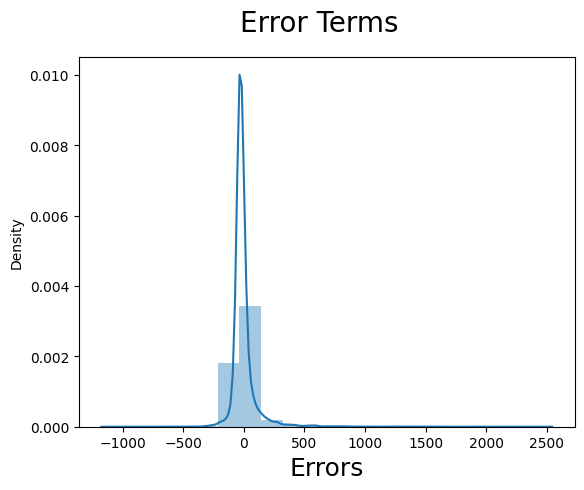

In [307]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [339]:
#Predicting the price
test_df = pd.read_csv("test_(2)_(1).csv")
test_df.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony
0,0,Super built-up Area,Ready To Move,Chamrajpet,2 BHK,NaN,650,1.0,1.0
1,1,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,SrncyRe,1370,2.0,1.0
2,2,Super built-up Area,Ready To Move,Whitefield,3 BHK,AjhalNa,1725,3.0,2.0
3,3,Built-up Area,Ready To Move,Jalahalli,2 BHK,NaN,1000,2.0,0.0
4,4,Plot Area,Ready To Move,TC Palaya,1 Bedroom,NaN,1350,1.0,0.0


In [340]:
test_df['bhk'] = full_merged_df["size"].str.extract('(\d+)')
test_df['bhk'] = test_df["bhk"].astype(np.number)
test_df.head()


C:\Users\priya\anaconda3\envs\AlgoTrading\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  npdtype = np.dtype(dtype)


,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,bhk
0,0,Super built-up Area,Ready To Move,Chamrajpet,2 BHK,NaN,650,1.0,1.0,2.0
1,1,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,SrncyRe,1370,2.0,1.0,4.0
2,2,Super built-up Area,Ready To Move,Whitefield,3 BHK,AjhalNa,1725,3.0,2.0,3.0
3,3,Built-up Area,Ready To Move,Jalahalli,2 BHK,NaN,1000,2.0,0.0,3.0
4,4,Plot Area,Ready To Move,TC Palaya,1 Bedroom,NaN,1350,1.0,0.0,2.0


In [341]:
#Missing Value identification and imputation
test_df.balcony.fillna(0, inplace=True)

In [342]:
test_df.isnull().sum()

ID                 0
area_type          0
availability       0
location           0
size               2
society         1074
total_sqft         0
bath               8
balcony            0
bhk                3
dtype: int64

In [343]:
test_df = test_df[["ID", "bhk", "total_sqft", "bath", "balcony"]]

In [344]:
test_df.head()

,ID,bhk,total_sqft,bath,balcony
0,0,2.0,650,1.0,1.0
1,1,4.0,1370,2.0,1.0
2,2,3.0,1725,3.0,2.0
3,3,3.0,1000,2.0,0.0
4,4,2.0,1350,1.0,0.0


In [345]:
temp = test_df.total_sqft.str.extract(r'([a-zA-Z]+\w+[a-zA-Z]+)')
temp.rename(columns={0:"value"}, inplace=True)
temp.value_counts()

value 
Meter     2
Yards     2
Acres     1
Guntha    1
Name: count, dtype: int64

In [347]:
convert_total_sqft(test_df)
test_df['total_sqft'] = test_df['total_sqft'].astype(np.float64, copy=False)

896.9 896
660 - 780 660
1419.59 1419
1618 - 1929 1618
1626.6 1626
1150 - 1194 1150
684 - 810 684
866.28 866
1584.01 1584
1200 - 1800 1200
1510 - 1670 1510
1248.52 1248
1370.07 1370
1550 - 1590 1550
777.4 777
1752.12 1752
1777.26 1777
1235 - 1410 1235
3484 - 3550 3484
1139.7 1139
38Guntha 38
1107.83 1107
929 - 1078 929
2150 - 2225 2150
1520 - 1759 1520
2580 - 2591 2580
629 - 1026 629
1215 - 1495 1215
6Acres 6
1140 - 1250 1140
2400 - 2600 2400
1052 - 1322 1052
5666 - 5669 5666
2162.03 2162
620 - 934 620
2999.97 2999
1950.2 1950
712 - 938 712
2171.66 2171
1783 - 1878 1783
120Sq. Yards 120
1950.2 1950
24Sq. Meter 24
2528 - 3188 2528
1623.29 1623
650 - 760 650
1400 - 1421 1400
4000 - 4450 4000
2087.01 2087
142.84Sq. Meter 142
300Sq. Yards 300
2777.29 2777
1115 - 1130 1115
1932.47 1932
2204 - 2362 2204
1437 - 1629 1437
850 - 1060 850
1804 - 2273 1804
1200 - 1470 1200
5665.84 5665
1331.95 1331
1020 - 1130 1020
1133 - 1384 1133
2830 - 2882 2830


In [348]:
reduced_col.head()

,bhk,total_sqft,bath,balcony
0,2.0,1056.0,2.0,1.0
1,4.0,2600.0,5.0,3.0
2,3.0,1440.0,2.0,3.0
3,3.0,1521.0,3.0,1.0
4,2.0,1200.0,2.0,1.0


In [349]:
def fill_missing_bhk_test(df, ref_df):
    df.fillna(np.nan, inplace=True)
    ref_bhk = ref_df[["total_sqft", "bhk"]].groupby(pd.cut(ref_df['total_sqft'], bins=np.arange(0,200000,100), include_lowest=True), observed=False).median()
    
    bhk_is_null = df["bhk"].isnull()
    bath_is_null = df["bath"].isnull()
    #print(df.shape, bhk_is_null.shape)
    for idx in range(df.shape[0]):
        #print(df.iloc[idx])
        if(bhk_is_null[idx] == True):
            #print("Found bhk is Null")
            #print(df.iloc[idx])
            if(bath_is_null[idx] != True):
                df.iloc[idx, df.columns.get_loc('bhk')] = df.iloc[idx, df.columns.get_loc('bath')]
                #print("Setting bath as bhk", df.iloc[idx, df.columns.get_loc('bath')])
            else:
                sqft = df.iloc[idx, df.columns.get_loc('total_sqft')]
                df.iloc[idx, df.columns.get_loc('bhk')] = ref_bhk.loc[sqft]["bhk"]
                #print("Setting %d as bhk" %(ref_bhk.loc[sqft]["bhk"]))
    print(df.isnull().sum())
fill_missing_bhk_test(test_df, reduced_col)
test_df.isnull().sum()

ID            0
bhk           0
total_sqft    0
bath          8
balcony       0
dtype: int64


ID            0
bhk           0
total_sqft    0
bath          8
balcony       0
dtype: int64

In [350]:
fill_missing_bath(test_df)
test_df.isnull().sum()

ID            0
bhk           0
total_sqft    0
bath          0
balcony       0
dtype: int64


ID            0
bhk           0
total_sqft    0
bath          0
balcony       0
dtype: int64

In [351]:
test_df.head()

,ID,bhk,total_sqft,bath,balcony
0,0,2.0,650.0,1.0,1.0
1,1,4.0,1370.0,2.0,1.0
2,2,3.0,1725.0,3.0,2.0
3,3,3.0,1000.0,2.0,0.0
4,4,2.0,1350.0,1.0,0.0


In [352]:
copy_test = test_df.copy()

In [353]:
test_df.drop("ID", axis=1,inplace=True)

In [354]:
X_test = test_df

In [355]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         2664 non-null   float64
 1   total_sqft  2664 non-null   float64
 2   bath        2664 non-null   float64
 3   balcony     2664 non-null   float64
dtypes: float64(4)
memory usage: 83.4 KB


In [356]:
y_pred = lm.predict(X_test)

In [357]:
y_pred

0        32.330379
1        69.327483
2       126.305779
3        82.106786
4        37.187751
           ...    
2659    197.636190
2660    234.459895
2661     85.749643
2662    176.873222
2663     15.808659
Length: 2664, dtype: float64

In [359]:
print(id_)

None


In [360]:
print(test_df.shape)

(2664, 4)


In [361]:
test_df["price"] = y_pred
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         2664 non-null   float64
 1   total_sqft  2664 non-null   float64
 2   bath        2664 non-null   float64
 3   balcony     2664 non-null   float64
 4   price       2664 non-null   float64
dtypes: float64(5)
memory usage: 104.2 KB


In [363]:
output = pd.read_csv("test_(2)_(1).csv")
output["price"] = y_pred
output=output[["ID", "price"]]
output.head()

,ID,price
0,0,32.330379
1,1,69.327483
2,2,126.305779
3,3,82.106786
4,4,37.187751


In [364]:
output.to_csv("FirstIteration.csv")